# Skip-Gram ile Kelimeleri Vektörleştirme


In [7]:
!python -m pip install -U gensim

Defaulting to user installation because normal site-packages is not writeable


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [6]:
#400bin kelime olan bir dste çalışacağız
import warnings
warnings.filterwarnings('ignore')
import numpy as np
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [1]:
f=open('hurriyet.txt','r',encoding='utf8') #r: reading. encoding=türkçe karakter okuması için utf8 e dikkat.
text=f.read()
#tokenleştirme için nltk kullanabilirsin ama zaten burada sayı yok noktalama yok kendimiz de yapabiliriz.


In [3]:
t_list=text.split('\n')#eldeki metin yeni satırlarla ayrılmış cümleler vardı.
#bundan sonra cümlelerden oluşan bir liste var.
t_list

['iran devlet televizyonu ülkedeki eyaletin sinde yapılan reformcuları protesto amaçlı yürüyüşlere milyonlarca kişinin katıldığını bildirdi ',
 'gösterilerde fitnecilere ölüm münafıklara ölüm abd ye ölüm ingiltere ye ölüm sloganları atıldı ',
 'dini lider ali hamaney ve cumhurbaşkanı mahmud ahmedinejad ı destekleyen iranlılar son olaylarda yeğeni öldürülen mir hüseyin musevi başta olmak üzere muhalefet liderlerini kınadılar ',
 'musevi ye ölüm ve idam idam sloganları duyuldu ',
 'muhalefet liderleri kaçtı mı aşure günü yaşanan çatışmalarda devlet kaynaklarına göre u terörist olmak üzere kişi ölmüştü ',
 'den fazla kişinin yaralandığı olaylar sırasında en az kişi tutuklanmıştı ',
 'öte yandan iran haber ajansı irna muhalif liderler mir hüseyin musevi ve mehdi kerrubi nin başkentten kaçarak ülkenin kuzeyine geçtiğini ileri sürdü ancak muhalefet iddiayı yalanladı ',
 'hamaney in bir dönem korumalığını yapan ve şu anda fransa da saklandığı söylenen bir kişinin muhalefete verdiği bilgilere 

In [4]:
corpus=[cumle.split() for cumle in t_list] # eldeki cümleleri kelimelere ayırdık.her cümle kelimelerden oluşan bir list artık.
corpus

[['iran',
  'devlet',
  'televizyonu',
  'ülkedeki',
  'eyaletin',
  'sinde',
  'yapılan',
  'reformcuları',
  'protesto',
  'amaçlı',
  'yürüyüşlere',
  'milyonlarca',
  'kişinin',
  'katıldığını',
  'bildirdi'],
 ['gösterilerde',
  'fitnecilere',
  'ölüm',
  'münafıklara',
  'ölüm',
  'abd',
  'ye',
  'ölüm',
  'ingiltere',
  'ye',
  'ölüm',
  'sloganları',
  'atıldı'],
 ['dini',
  'lider',
  'ali',
  'hamaney',
  've',
  'cumhurbaşkanı',
  'mahmud',
  'ahmedinejad',
  'ı',
  'destekleyen',
  'iranlılar',
  'son',
  'olaylarda',
  'yeğeni',
  'öldürülen',
  'mir',
  'hüseyin',
  'musevi',
  'başta',
  'olmak',
  'üzere',
  'muhalefet',
  'liderlerini',
  'kınadılar'],
 ['musevi', 'ye', 'ölüm', 've', 'idam', 'idam', 'sloganları', 'duyuldu'],
 ['muhalefet',
  'liderleri',
  'kaçtı',
  'mı',
  'aşure',
  'günü',
  'yaşanan',
  'çatışmalarda',
  'devlet',
  'kaynaklarına',
  'göre',
  'u',
  'terörist',
  'olmak',
  'üzere',
  'kişi',
  'ölmüştü'],
 ['den',
  'fazla',
  'kişinin',
  'yar

In [21]:
model=Word2Vec(corpus,vector_size=100,window=5,min_count=5,sg=1)


In [22]:
model.wv['istanbul'] #100 uzunluğunda bir vektör. np array olarak saklanıyor.

array([ 0.02735792, -0.15383895,  0.03968782,  0.00273363,  0.5412679 ,
       -0.12820132, -0.21400438,  0.5285145 , -0.4928017 ,  0.03564468,
       -0.38519138, -0.42651802,  0.50414526,  0.02101205,  0.00388435,
        0.38930765, -0.0546632 , -0.01219076,  0.22842693, -0.3534463 ,
       -0.323453  , -0.30846584,  0.31859565, -0.24517311, -0.53932106,
       -0.23651546, -0.86627084,  0.6601673 , -0.19391058,  0.23530947,
        0.42344022, -0.31941834, -0.47346407, -0.04131032,  0.02385207,
       -0.25941998, -0.15029116, -0.07124166,  0.29206517, -0.56412077,
        0.1431854 , -0.01677673,  0.49105412, -0.05084113,  0.29176164,
        0.46114132, -0.38945413, -0.28870437,  0.12731634, -0.06513406,
        0.2923426 , -0.16856174,  0.2237007 ,  0.06406135, -0.5357565 ,
        0.20877245,  0.25674656,  0.1933083 , -1.0554595 , -0.21660127,
       -0.10587848,  0.31894886, -0.07841232,  0.2477975 , -0.32692304,
        0.22107004,  0.03948529,  0.28338322, -0.40923214, -0.04

In [23]:
model.wv.most_similar('hollanda')#kelime haznesinden bir kelime yaz.olmayanı yazarsan hata alırsın


[('danimarka', 0.8219931721687317),
 ('avusturya', 0.7912209033966064),
 ('kanada', 0.7826605439186096),
 ('almanya', 0.7771917581558228),
 ('belçika', 0.7758076190948486),
 ('finlandiya', 0.7581555247306824),
 ('letonya', 0.7326244115829468),
 ('lüksemburg', 0.7318668961524963),
 ('ispanya', 0.7281899452209473),
 ('avustralya', 0.7264460921287537)]

In [25]:
model.wv.most_similar('pazartesi')

[('perşembe', 0.9118792414665222),
 ('cumartesi', 0.9075527191162109),
 ('çarşamba', 0.9016532301902771),
 ('salı', 0.8906856775283813),
 ('günü', 0.8894087672233582),
 ('cuma', 0.8806366324424744),
 ('akşamı', 0.8684833645820618),
 ('sabahı', 0.8319376111030579),
 ('pazar', 0.8116129636764526),
 ('gecesi', 0.7489376068115234)]

In [26]:
#sondan ek ekleme var türkçede. ekli kelimeler model 2 farklı kelime olarak algılıyor.

In [112]:
a=model.wv.most_similar('git')
print(a,type(a)) # tuple'lardan oluşan bir list var. ilk eleman 'git' e yakın olan kelime, ikinci eleman bu yakınlığın skaler ifadesi.


[('defol', 0.8205037713050842), ('bırak', 0.8200647830963135), ('gidin', 0.8107252717018127), ('eğilme', 0.7988675832748413), ('bağırdı', 0.797990083694458), ('hepinizi', 0.7899252772331238), ('defolun', 0.7853167653083801), ('geldiniz', 0.7827428579330444), ('bağırırken', 0.778272807598114), ('bağıran', 0.7720939517021179)] <class 'list'>


In [30]:
model.save('word2vec.model')#modeli daha sonra da kullanmak için kaydettik

In [9]:
from gensim.models import Word2Vec
model=Word2Vec.load('word2vec.model') # kullanmak üzere modeli çağırdık.

Bir kelimeye yakın kelimeleri görselleştirmek.


In [120]:
def closestwords_plot(model,word):
    #1  
    close_words=model.wv.most_similar(word)
    words=[i[0] for i in close_words]
    vectors=[list(model.wv[i[0]]) for i in close_words]
    
    #2
    words.insert(0, word)
    vectors.insert(0,list(model.wv[word]))
    
    vectors=np.array(vectors)
    
    #3
    tsne=TSNE(random_state=0)
    Y=tsne.fit_transform(vectors)
    
    x_coords=Y[:,0]
    y_coords=Y[:,1]
    
    plt.scatter(x_coords,y_coords)
    
    #4
    [plt.annotate(label,xy= (x,y),xytext=(5,-2),textcoords='offset points') for label,x,y in zip(words,x_coords,y_coords)]
    plt.show()
        

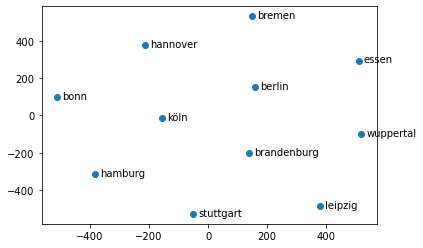

In [122]:
closestwords_plot(model, 'berlin')

1)
close_words de yakın kelimeler ve yakınlıklarını tuple'larda tuttuk. close_words tuple'lardan oluşan bir list. Tuple'ların ilk elemanı kelime, ikinci elemanı kelimenin verilen kelimeye olan yakınlığı idi.
words= close_words deki her tuple ın ilk elemanını yani bir kelimeyi alıyor ve words listini oluşturuyor.
vectors= close_words'deki tupllerdaki ilk elemanın vektörünü bularak vectors list'i oluşturuyor. Bunu words listinde iterate yaparak da bulabilirdik. model.wv'den çıkan sonuç array, bunu list olarak vectors'de tuttuk.

2)
fonksiyona verdiğimiz kelimeyi ve kelimenin vektörünü listelerimize insert ettik. hangi index'e ekleyeceğimizi belirttik.

3)
random_state=0 bir seed atadık.bunu her çalıştırdığımızda hep aynı sonucu alacağız, farklı grafikler elde etmemek için için.
tsne'den koordinatlar alacağız. aşağıda tsne_results fonksiyonu sonucunda bunları da görebilirz.
Bu koordinatlardan plot elde etmek için x coordinatlarını ve y koordantlarını farklı değişkenlere verdik.
yani;
 Y'de koordinatlar matris olarak tutuluyor(array). 
 x_coords ve y_coords olarak vektörleri tutacağız.
 Y[:,0] ile Y'nin ilk sütununu aldım, x koornatlarını
 Y[:,1] ile ikinci sütun olan y koordinatlarını.
 
 scatter ile noktalı bir grafik çizeceğiz.
 
 
4)
 grafik üstünde kelimeleri yazdırmak için her nokta için bir kelime yazacağız.
 zip ile tüm listeleri zip içine alıp tek yerde topladık.
 annotate ile grafik üstüne yazı yazıyoruz.
 label= yani kelimem
 xy= yazı nereye yazılacak yani koordinatlarım
 xytext= grafikte kelimeyi tam nokta üzerine yazıyoruz. kelime ve nokta birleşmesin diye kelimeyi noktanın neresine yazacağımızı belirtiyoruz. kenara kaydırıyoruz gibi.
 textcoords= xytext olarak belirlediğimiz değerin, noktalara göre yerleşeceğini belirtiyoruz. bunu belirtmezsek kelimeler grafiğin ortası baz alınarak yerleştirilir.(bir altta görseli görebiliriz.)

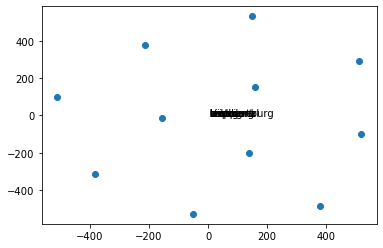

In [123]:
#offset belirtilmemiş plot.

In [7]:
def tsne_results(model,word):
        
    close_words=model.wv.most_similar(word)#tupplelar. 
    words=[i[0] for i in close_words]
    vectors=[list(model.wv[i[0]]) for i in close_words]
    
    words.insert(0, word)
    vectors.insert(0,list(model.wv[word]))
    
    vectors=np.array(vectors)
    
    tsne=TSNE(random_state=0)
    Y=tsne.fit_transform(vectors)
    return Y

In [10]:
Y=tsne_results(model,'berlin')
Y

array([[ 158.30424 ,  152.85916 ],
       [-154.90863 ,  -15.818744],
       [-213.98087 ,  376.24023 ],
       [ 378.75882 , -486.59897 ],
       [-381.8619  , -316.0079  ],
       [ 148.38574 ,  530.91614 ],
       [ -51.129013, -527.20276 ],
       [ 137.89061 , -201.22983 ],
       [-511.84128 ,   96.37503 ],
       [ 509.04468 ,  293.87186 ],
       [ 518.29144 ,  -99.62894 ]], dtype=float32)

In [11]:
Y=tsne_results(model,'berlin')
Y[:,0],Y[:,1]

(array([ 158.30424 , -154.90863 , -213.98087 ,  378.75882 , -381.8619  ,
         148.38574 ,  -51.129013,  137.89061 , -511.84128 ,  509.04468 ,
         518.29144 ], dtype=float32),
 array([ 152.85916 ,  -15.818744,  376.24023 , -486.59897 , -316.0079  ,
         530.91614 , -527.20276 , -201.22983 ,   96.37503 ,  293.87186 ,
         -99.62894 ], dtype=float32))